<a href="https://colab.research.google.com/github/yoonkei/Mining/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#csv 데이터 가져오기 
한글 데이터이니 인코딩 변경을 해주고 가져오기 



In [55]:
plt.rc('font', family='NanumBarunGothic')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
health = pd.read_csv("/content/drive/My Drive/Mining/health_data.csv", encoding='UTF8')
 

# 데이터 탐색

In [56]:
health.shape 

(10000, 31)

In [57]:
display(health.head()) 
print(health.info()) 


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

# 데이터 시각화




In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

##요단백 관련 분석


요단백은 소변에 단백질이 섞여 나오는 것으로 신장이 제기능을 다하지 못할때 발병된다. 대부분의 요단백의 경우 눙축뇨에 의한 위양성인 경우가 많지만, 일부 환자의 경우 이 현상이 6개월 이상 지속되는 지속 요단백인 경우도 있다.
지속단백뇨는 신증후군, 급성/만성 사구체 신염, 신우신염, 신장 종양, 고협압, 당뇨로 인한 신장 합병증, 울혈성 심부전 등의 다양한 원인으로 인해 발병된다. 위양성이 많은 질병이라, 6개월 이상의 지속적인 추적검사를 통해 질병의 여부를 판별하는데, 활동하는 낮에는 양성, 활동하지 않는 밤에는 음성이 나오는 등 정확한 검사 결과를 얻기에는 많은 어려움이 있다, 

이러한 어려움을 덜어보고자, 데이터 분석을 통해 장기간의 추적검사 없이도 지속단백뇨와 농축뇨에 의한 위양성을 구분할 수 있는지 알아보고자, 데이터 분석을 진행하려 한다. 




### 요단백과 혈청크레아티닌

크레아티닌은 신장에서 배설되는 물질로 신기능 장애가 발생하면 증량하는 물질이다. 크레아티닌은 근육의 발육 및 운동과 관련하여 증감하는 물질이기에 단백질과도 연관이 있다. 요단백과 혈청크레아티닌은 단백질, 신기능장애 두 부분에서 연관이 있기 때문에 데이터 분석을 통해 지나친 운동으로 인한 근육의 발육과 요단백 사이의 연관성을 파악할 수 있으리라 추측되어 이를 바탕으로 데이터 탐색을 하였다. 

In [47]:
df_health = health.groupby('요단백' , as_index = False).agg( mean_CREATININE = ('혈청크레아티닌', 'mean'))
df_health

,요단백,mean_CREATININE
0,1.0,0.839138
1,2.0,0.844416
2,3.0,0.976667
3,4.0,1.286585
4,5.0,1.169565
5,6.0,1.542857


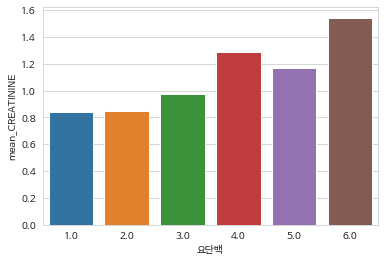

In [48]:
sns.barplot(data = df_health, x = '요단백', y = 'mean_CREATININE')

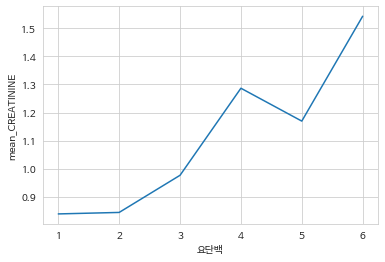

In [51]:
sns.lineplot(data = df_health, x = '요단백', y = 'mean_CREATININE')

요단백의 정도를 6수준으로 나누었을 때, 전반적으로 요단백의 정도가 커질수록 혈청크레아티닌의 평균 수치가 증가하므로, 둘은 양의 상관관계를 가지고 있는 것으로 보인다. 대다수의 경우에서 과도한 운동으로 인한 신기능 장애의 정도가 커질수록 요단백의 정도도 커짐을 알 수 있다. 

*요단백 분류 기준: 1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)



### 요단백과 혈압

단백뇨의 경우 고혈압으로 인해 발병되기도 하는 질병이기도 하고, 단백뇨로 인해 사구체 신염에 의한 고혈압 증상이 동반되기도 한다. 그렇기에 혈압과 요단백간의 관계를 분석하는 것 또한 유의미한 결과가 나올 것 같아서 데이터 분석을 하고자 한다. 

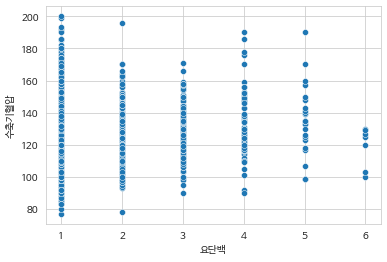

In [59]:
sns.scatterplot(data = health, x = '요단백', y = '수축기혈압')

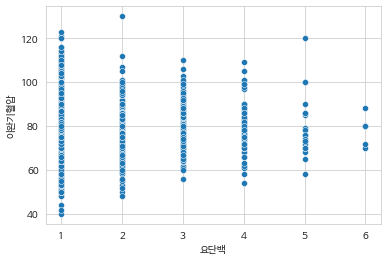

In [60]:
sns.scatterplot(data = health, x = '요단백', y = '이완기혈압')

혈압과 관련된 지표인 수축기혈압, 이완기혈압을 요단백 지표와 비교하였을 때, 두 지표 모두 요단백의 정도가 심할수록 개개인의 혈압데이터가 대체적으로 점점 더 y축기준으로 위쪽에 분포하는 양상을 보인다. 이로 미루어 보아, 고혈압과 요단백 또한 양의 상관관계를 갖는 것으로 추측된다.   

### 요단백과 당뇨

앞서 위에서 말했듯, 당뇨로 인한 신장 합병증도 요단백의 원인 중 하나이다. 당뇨와 관련된 수치인 식전혈당을 활용하여 요단백과 당뇨의 상관관계를 찾고자 한다. 

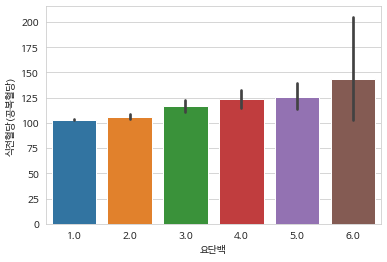

In [68]:
sns.barplot(data = health, x = '요단백', y = '식전혈당(공복혈당)')

데이터를 시각화한 결과를 보면, 공복혈당이 높은 사람일 수록 요단백의 정도가 심함을 알 수 있다. 

# 탐색적 분석 결과

데이터 시각화를 통해 요단백과 다른 수치들관의 연관성을 탐구해보았다. 크레아티닌, 혈압, 당뇨 모두 요단백과의 양의 상관관계를 보였으므로, 지속적인 추적검사 이전에 피검사나 형압 측정을 통해 크레아티닌, 혈압, 혈당을 먼저 검사하여 이를 진료에 활용한다면, 지속단백뇨와 농축뇨에 의한 위양성을 구분하여 지속단백뇨 환자에게 적합한 치료를 더 빨리 제공할 수 있을 것이다. 